### 1. Data Description

In [1]:
library(tidyverse)
library(tidymodels)
library(repr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

To determine the characteristics of the dataset, we should first read the datasets in R and then use the ```glimpse()``` to determine the number of variables and observations

In [2]:
players <- read_csv("projectData/players.csv")
sessions <- read_csv("projectData/sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
glimpse(players)
glimpse(sessions)

Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…
Rows: 1,535
Columns: 5
$ hashedEmail         <chr> "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8a…
$ start_time          <chr> "30/06/2024 18:12", "17/06/2024 23:33", "25/07/202…
$ end_time            <chr> "30/06/2024 18:24", "17/06/2024 23:46", "25/07/202…
$ original_start_time <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…
$ original_end_time   <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+

In [4]:
summary(players)
summary(sessions)

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

#### The ```players``` dataset has the following characteristics:
- **Number of observations** = 196
- **Number of variables** = 7
- **Summary Statistics**

**Variable**| **Mean** 
-------------|---------------
```played_hours``` | 5.85 hours
```Age``` | 21.14 years 


    
 **Description of variables**| **Data Type** | **Meaning**
  -----------------------------|---------------|------------
```experience```        |  Character          |  Experience level 
```subscribe```         |       Logical      | Player subscribed to the newsletter or not
```hashedEmail```|   Character | Player ID
```played_hours```|  Double | Hours spent playing the game
```name```        |  Character | Player name
```gender```       |  Character  | Player gender
```Age```        |   Double   | Player age

#### The ```sessions``` dataset has the following characteristics:
- **Number of observations** = 1535
- **Number of variables** = 5
- **Summary Statistics**
- **Description of variables**

  
**Description of variables**| **Data Type** | **Meaning**
-----------------------------|---------------|------------
```hashedEmail```     |  Character          |  Player ID 
```start_time```      | Character           | Date and time the player started the game
```end_time```        | Character           | Date and time the player ended the game
```original_start_time``` | Double | UNIX format for start time
```original_end_time```  | Double | UNIX format for end time

#### Potential Issues

- ```players``` - Variables like experience and gender are characters which can cause issues with fitting models because most models require either numeric or factor inputs.
- ```sessions```- The columns for start and end time are not in tidy format because each column consists of 2 observations (date and time) which should be split into its own columns before analysis

### 2. Question to address

We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.

#### Specific Question:

Q. Do **_gender_** and **_experience_** predict the number of played hours in the dataset?

The ```players``` dataset can be used to answer the above question because we have different player characteristics (e.g., gender, age, subscriber status) available and ```played_hours``` is related to how much data does each person contribute

To wrangle the dataset, we first ```select``` the relevant columns. The columns with the character data type should be converted into factors such that each variable can be treated as a category in the predictive model (see #3 below)

### 3. Exploratory Data Analysis and Visualization

- The datasets were loaded into R in the beginning and named ```players``` and ```sessions```. The following code chunk shows a preview of these datasets
- Refer to section 1 for mean values for ```players``` dataset

In [5]:
head(players)
head(sessions)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


- The following code chunk demonstrates the wrangling required to get the data into tidy format for analysis.

In [6]:
players_select <- players|>
                    select(experience, played_hours, gender)|>
                    mutate(experience = as.factor(experience),
                           gender = as.factor(gender))
players_select

experience,played_hours,gender
<fct>,<dbl>,<fct>
Pro,30.3,Male
Veteran,3.8,Male
Veteran,0.0,Male
Amateur,0.7,Female
Regular,0.1,Male
Amateur,0.0,Female
Regular,0.0,Female
Amateur,0.0,Male
Amateur,0.1,Male


- We can use a bar graph to visualize how does different experience level relate to the average number of played hours.

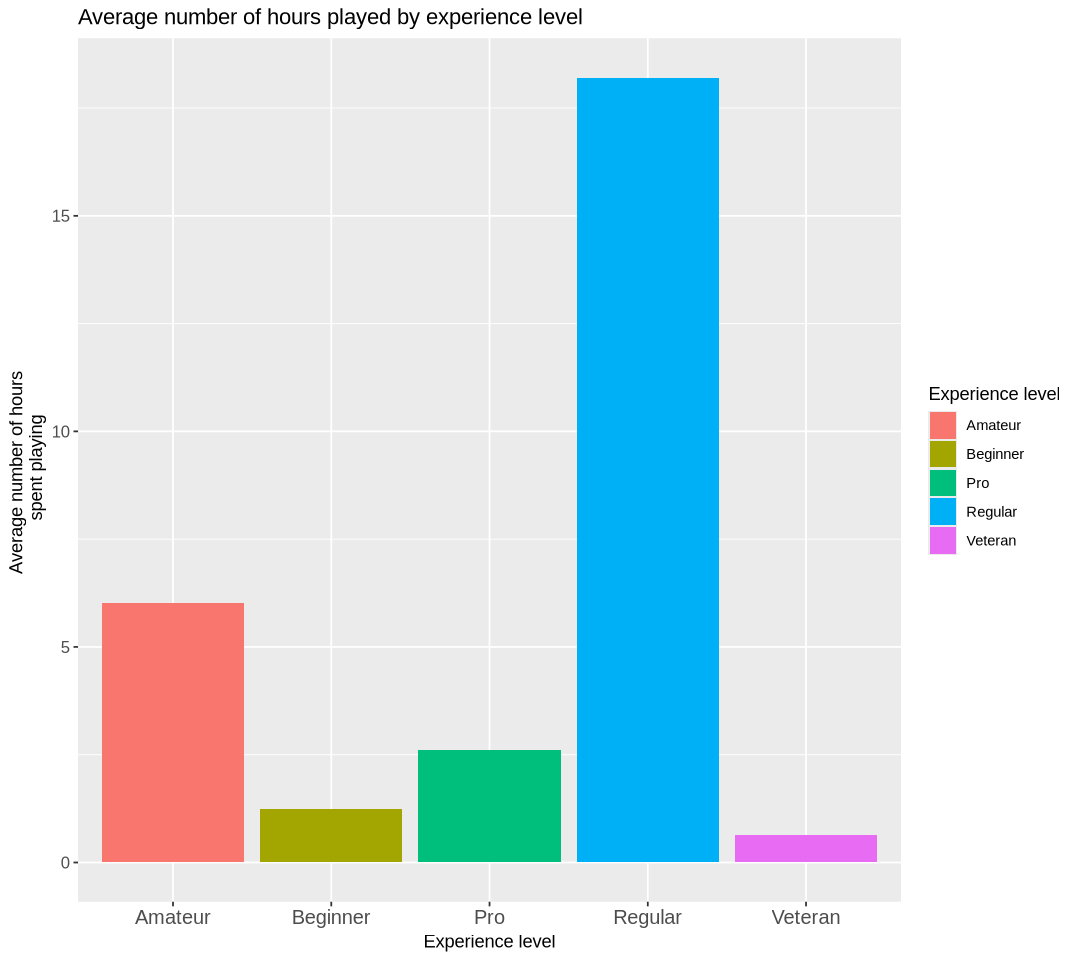

In [16]:
options(repr.plot.height = 8, repr.plot.width = 9)
experience_bargraph <- players_select|>
                      group_by(experience)|>
                      summarise(avg_hours = mean(played_hours))|>
                      ggplot(aes(x = experience, y = avg_hours, fill = experience))+
                      geom_bar(stat = "identity")+
                    theme(axis.text.x = element_text(size = 12),
                         axis.text.y= element_text(size = 10))+
                      labs(x = "Experience level",
                           y = "Average number of hours \n spent playing",
                           fill = "Experience level")+
                        ggtitle("Average number of hours played by experience level") 
experience_bargraph

- We can also plot a bar graph to visualize the relationship between ```avg_hours``` and ```gender```

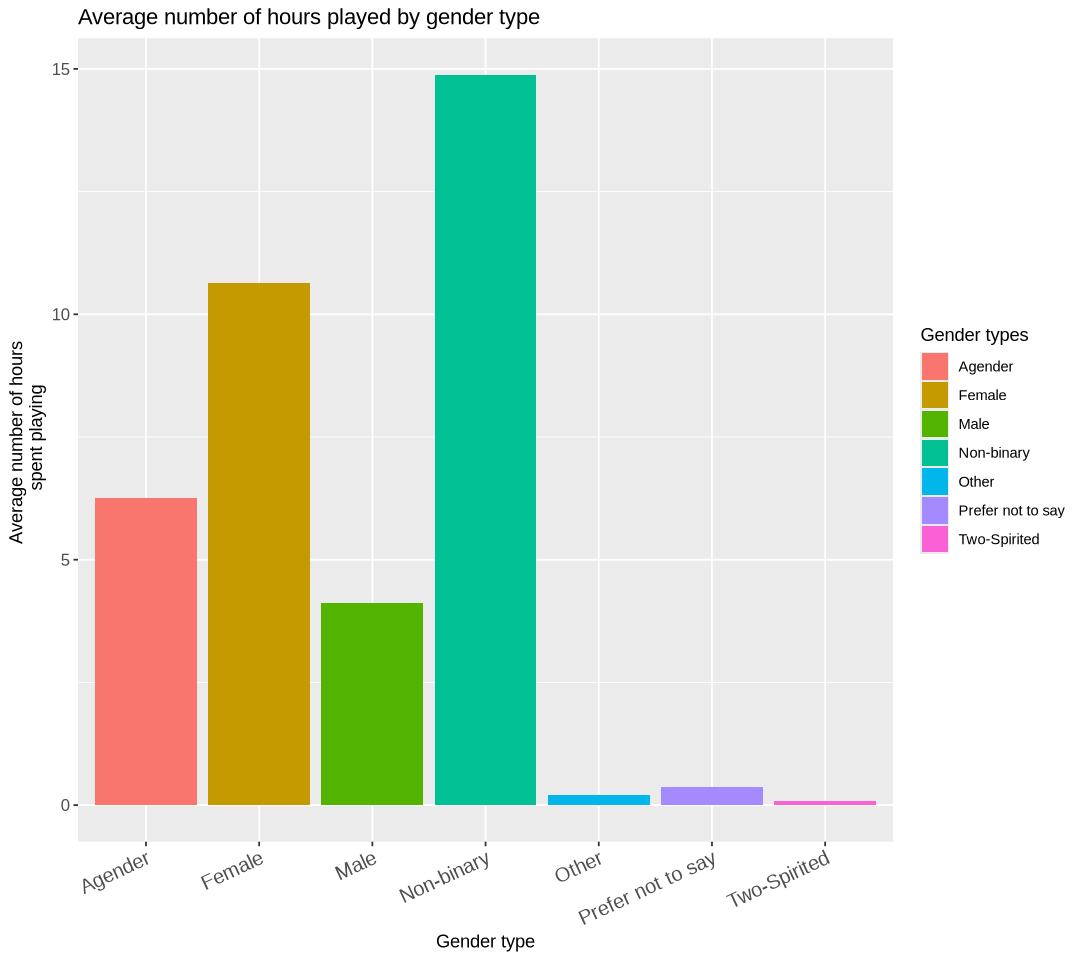

In [13]:
options(repr.plot.height = 8, repr.plot.width = 9)
gender_bargraph <- players_select|>
                    group_by(gender)|>
                    summarise(avg_hours = mean(played_hours))|>
                    ggplot(aes(x = gender, y = avg_hours, fill = gender))+
                    geom_bar(stat = "identity")+
                    theme(axis.text.x = element_text(angle = 25, hjust = 1, size = 12),
                         axis.text.y= element_text(size = 10))+
                    labs(x = "Gender type",
                         y = "Average number of hours \n spent playing",
                         fill = "Gender types")+
                    ggtitle("Average number of hours played by gender type") 
                    
gender_bargraph

- The average playing time is highest for players in the regular experience level (~ 18 hours) 
- Non-binary individuals have the highest average playing hours (~ 15 hours), compared to other gender types

### 4. Methods and Plan

To answer the specific question we will use a multivariable linear regression model on the ```players``` dataset.

- This model is appropriate because we want to predict a continuous response variable (```played_hours```) from two categorical variables (```gender```, ```experience```). The categorical variables were converted into factors in the ```players_selected``` dataset, such that they can be used as predictors in the linear regression model
  
- The model assumes a linear relationship between the response and predictor variables and attempts to fit a straight line through the data

- However, if the relationship between response variable and predictor variables is non-linear, the model will underfit because it always assumes a linear relationship between the two. Additionally, if the predictors are very linearly related, then this model will become very sensitive to even slight changes in the data

- The dataset will be split into training (70%) and test set (30%) with ```prop = 0.7``` **before** any modeling is performed. All model metrics will be assessed on the training set. The data should be split **after wrangling** to ensure it is in tidy format

- To compare the model, the training set will be used to assess the metrics such as RMSE values. We will fit both the linear and knn regression models to compare performance. A 5-fold cross-validation will be performed to evaluate performance across different subsets of the data